### Prototype of integrating TVB with SIIBRA - Download a structural connectivity from SIIBRA and setup a TVB simulation with it
#### (This is an adaptation of https://github.com/dickscheid/siibra-tutorials/blob/main/06-SIIBRA-TVB.ipynb, which used an older version of siibra-python)

### Imports and setup

In [1]:
%matplotlib widget

In [2]:
import os
import numpy as np
import siibra
from tvb.simulator.lab import *

[siibra:INFO] Version: 0.4a35
[siibra:WARNING] This is a development release. Use at your own risk.
[siibra:INFO] Please file bugs and issues at https://github.com/FZJ-INM1-BDA/siibra-python.


In [3]:
# Add an EBRAINS token
os.environ['HBP_AUTH_TOKEN'] = ''

In [3]:
# alterantively, use siibra service for authentication into EBRAINS
siibra.fetch_ebrains_token()

***
To continue, please go to https://iam.ebrains.eu/auth/realms/hbp/device?user_code=GPFL-INXR
***
ebrains token successfuly set.


### Get connectivity matrices

#### Connectivity weights

In [4]:
# get desired brain parcellation
atlas = siibra.atlases["human"]
jubrain = atlas.get_parcellation("julich 2.9")

Loading preconfigured Parcellation instances: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 79.52it/s]


In [5]:
# get the Streamline Counts (conn. weights) features
# this gives a list of Streamline Counts objects corresponding to a different cohort; each Streamline Count obj. has multiple connectivities
features = siibra.features.get(jubrain, siibra.features.connectivity.StreamlineCounts)
for f in features:
    print(f.cohort)

Loading preconfigured StreamlineCounts instances: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 1508.38it/s]
Matching StreamlineCounts to Julich-Brain Probabilistic Cytoarchitectonic Maps (v2.9): 100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.50it/s]

HCP
1000BRAINS


In [7]:
# select one of the cohorts and get all the connectivities for all the subjects
conn_weights = features[0]
print(f'There are connectivity weights available for {len(conn_weights.subjects)} subjects')

There are connectivity weights available for 200 subjects


In [8]:
# get the connectivity matrix for one of the subjects
subject = conn_weights.subjects[0]  # this gives us a string containing the subject id
weights_matrix = conn_weights.get_matrix(subject)  # matrix stored as pandas DataFrame
weights_matrix

,Area 45 (IFG) left,Area 44 (IFG) left,Area Fo1 (OFC) left,Area Fo2 (OFC) left,Area Fo3 (OFC) left,Area hOc5 (LOC) left,"Area hOc2 (V2, 18) left","Area hOc1 (V1, 17, CalcS) left",Area hOc4v (LingG) left,Area hOc3v (LingG) left,...,Area Ia2 (Insula) right,Area Id8 (Insula) right,Area Id10 (Insula) right,BST (Bed Nucleus) right,Frontal-I (GapMap) right,Frontal-II (GapMap) right,Temporal-to-Parietal (GapMap) right,Frontal-to-Occipital (GapMap) right,Frontal-to-Temporal-I (GapMap) right,Frontal-to-Temporal-II (GapMap) right
Area 45 (IFG) left,8500,4318,2,2,47,5,5,14,3,14,...,0,5,1,1,1371,93,35,156,5,4
Area 44 (IFG) left,4318,22447,2,2,22,3,2,3,2,9,...,0,1,1,2,221,613,82,202,0,3
Area Fo1 (OFC) left,2,2,2636,4701,1902,7,18,48,8,51,...,1,1,31,1,162,0,37,78,5,65
Area Fo2 (OFC) left,2,2,4701,5939,2419,2,5,19,4,28,...,0,0,16,0,46,0,13,26,2,30
Area Fo3 (OFC) left,47,22,1902,2419,33345,32,94,286,56,284,...,0,0,5,3,69,4,46,161,2,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Frontal-II (GapMap) right,93,613,0,0,4,0,1,2,0,2,...,0,75,39,25,9106,64770,11476,165,157,41
Temporal-to-Parietal (GapMap) right,35,82,37,13,46,36,493,457,147,515,...,1678,125,1562,139,9066,11476,266221,9549,1231,12764
Frontal-to-Occipital (GapMap) right,156,202,78,26,161,108,2061,1883,457,1533,...,1,38,59,63,17348,165,9549,164784,33,13872
Frontal-to-Temporal-I (GapMap) right,5,0,5,2,2,1,4,5,1,6,...,21,3846,5014,53,1047,157,1231,33,5558,449


#### Connectivity tracts

In [9]:
# get the Streamline Lengths (conn. tracts) features
# this gives a list of Streamline Lengths object corresponding to a different cohort; each Streamline Lengths obj. has multiple connectivities
features_lengths = siibra.features.get(jubrain, siibra.features.connectivity.StreamlineLengths)
for f in features_lengths:
    print(f.cohort)

Loading preconfigured StreamlineLengths instances: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 142.84it/s]
Matching StreamlineLengths to Julich-Brain Probabilistic Cytoarchitectonic Maps (v2.9): 100%|██████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 120.01it/s]

HCP
1000BRAINS


In [10]:
# select one of the cohorts and get all the connectivities for all the subjects
conn_tracts = features_lengths[0]
conn_tracts.name
print(f'There are connectivity tracts available for {len(conn_tracts.subjects)} subjects')

There are connectivity tracts available for 200 subjects


In [11]:
# get the connectivity matrix for one of the subjects
subject = conn_tracts.subjects[0]  # this gives us a string containing the subject id
tracts_matrix = conn_tracts.get_matrix(subject)  # matrix stored as pandas DataFrame
tracts_matrix[10:20]

,Area 45 (IFG) left,Area 44 (IFG) left,Area Fo1 (OFC) left,Area Fo2 (OFC) left,Area Fo3 (OFC) left,Area hOc5 (LOC) left,"Area hOc2 (V2, 18) left","Area hOc1 (V1, 17, CalcS) left",Area hOc4v (LingG) left,Area hOc3v (LingG) left,...,Area Ia2 (Insula) right,Area Id8 (Insula) right,Area Id10 (Insula) right,BST (Bed Nucleus) right,Frontal-I (GapMap) right,Frontal-II (GapMap) right,Temporal-to-Parietal (GapMap) right,Frontal-to-Occipital (GapMap) right,Frontal-to-Temporal-I (GapMap) right,Frontal-to-Temporal-II (GapMap) right
Area TE 1.0 (HESCHL) left,0.000000,93.387878,0.000000,0.000000,0.000000,65.932945,110.852051,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,131.980804,0.000000,0.000000
Area TE 2.1 (STG) left,120.328444,102.889541,0.000000,0.000000,117.160255,102.376215,102.475823,94.565906,111.823922,103.209312,...,0.0,0.000000,204.580399,169.961044,0.000000,156.839386,182.254425,121.441785,0.000000,0.000000
"(temporo-parietal junction, Area TPJ (STG/SMG) left)",130.002003,106.342628,0.000000,0.000000,130.066116,111.993088,119.578564,128.656424,146.786993,128.400052,...,0.0,0.000000,0.000000,0.000000,213.899200,0.000000,148.022252,111.962591,0.000000,0.000000
Area TE 1.2 (HESCHL) left,112.442211,108.445357,0.000000,0.000000,0.000000,0.000000,99.884292,104.526335,85.826088,112.363628,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,158.393239,121.643111,0.000000,173.891830
Area TE 3 (STG) left,136.207619,118.139677,0.000000,0.000000,184.046974,95.262511,111.593129,107.193052,107.628165,106.830007,...,0.0,0.000000,203.329773,158.343811,207.061152,177.987854,185.085192,139.857008,0.000000,190.033691
Area TE 1.1 (HESCHL) left,100.668898,97.700007,182.932693,0.000000,130.475460,81.355379,94.807958,115.645995,88.000225,106.567631,...,0.0,0.000000,193.031616,0.000000,166.385422,136.359591,153.613554,114.615120,0.000000,168.587692
Area TE 2.2 (STG) left,101.755922,86.847938,0.000000,211.068848,118.013778,79.582071,108.796627,114.657543,119.075475,108.402818,...,0.0,0.000000,0.000000,0.000000,182.046947,150.412341,148.249648,120.170437,0.000000,160.654190
Area 33 (ACC) left,64.587969,64.708018,47.164964,47.980594,63.647204,0.000000,186.203992,161.596669,0.000000,188.282146,...,0.0,120.922019,116.708075,108.380592,82.144888,108.830364,164.310936,85.749562,91.723586,99.503125
Area s32 (sACC) left,224.406418,0.000000,13.130164,21.002622,48.429825,0.000000,193.764542,0.000000,170.416008,157.412064,...,0.0,0.000000,91.676448,0.000000,128.740083,0.000000,131.594152,152.755940,127.274129,94.363002
Area p32 (pACC) left,164.542572,193.515803,37.284100,39.241795,59.647963,188.177643,0.000000,173.150632,0.000000,170.906853,...,0.0,135.377871,120.974913,150.165108,100.610463,145.636551,215.230603,129.511028,118.805912,109.022229


In [12]:
# check that the weights and tracts have the same format
assert len(weights_matrix) == len(tracts_matrix)
assert weights_matrix.columns.to_list() == tracts_matrix.columns.to_list()
assert (weights_matrix.index == tracts_matrix.index).all()

### Get region names
##### (In siibra the indices of weights/tracts matrix are Region objects*)
\* sometimes they are tuples, where first value is name of parent of that region and second value is the actual region

In [13]:
# get list of region objects
regions = weights_matrix.index.values
# because sometimes we have tuples instead of regions, correct the list to have only regions
regions = [r[1] if type(r)==tuple else r for r in regions]
regions

[Area 45 (IFG) left,
 Area 44 (IFG) left,
 Area Fo1 (OFC) left,
 Area Fo2 (OFC) left,
 Area Fo3 (OFC) left,
 Area hOc5 (LOC) left,
 Area hOc2 (V2, 18) left,
 Area hOc1 (V1, 17, CalcS) left,
 Area hOc4v (LingG) left,
 Area hOc3v (LingG) left,
 Area TE 1.0 (HESCHL) left,
 Area TE 2.1 (STG) left,
 Area TPJ (STG/SMG) left,
 Area TE 1.2 (HESCHL) left,
 Area TE 3 (STG) left,
 Area TE 1.1 (HESCHL) left,
 Area TE 2.2 (STG) left,
 Area 33 (ACC) left,
 Area s32 (sACC) left,
 Area p32 (pACC) left,
 Area Id2 (Insula) left,
 Area Id3 (Insula) left,
 CA2 (Hippocampus) left,
 CA3 (Hippocampus) left,
 Entorhinal Cortex left,
 DG (Hippocampus) left,
 HC-Parasubiculum (Hippocampus) left,
 HC-Presubiculum (Hippocampus) left,
 HC-Prosubiculum (Hippocampus) left,
 CA1 (Hippocampus) left,
 HC-Subiculum (Hippocampus) left,
 HATA (Hippocampus) left,
 Area OP4 (POperc) left,
 Area OP1 (POperc) left,
 Area OP2 (POperc) left,
 Area OP3 (POperc) left,
 Area FG2 (FusG) left,
 Area FG1 (FusG) left,
 Area PGp (IPL) 

In [14]:
# get region names and the corresponding hemispheres
reg_names = []
hemi = []
for r in regions:
    name = r.name
    reg_names.append(name)
    
    if 'right' in name:
        hemi.append(1)
    # there is a bug on the else branch: there are regions which refer to both the right and left hemishperes;
    # right now they are put in the left hemisphere, but this is wrong! and should be corrected in some way
    else:
        hemi.append(0)

In [15]:
reg_names[:5]

['Area 45 (IFG) left',
 'Area 44 (IFG) left',
 'Area Fo1 (OFC) left',
 'Area Fo2 (OFC) left',
 'Area Fo3 (OFC) left']

In [16]:
# check the correctness of hemi array
hemi[:5]

[0, 0, 0, 0, 0]

In [17]:
# save regions related to both hemispheres for future reference?
both_hemi_regions = []
for r in regions:
    name = r.name
    if 'left' not in name and 'right' not in name:
        both_hemi_regions.append(r)
both_hemi_regions

[fastigial nucleus,
 globose nucleus,
 superior frontal sulcus,
 centromedial group,
 parieto-occipital sulcus,
 mesial precentral gyrus,
 posterior medial superior frontal gyrus,
 collateral sulcus,
 medial geniculate body,
 ventral striatum]

### Get region positions

In [18]:
# first we need a space in which the positions are computed
space = atlas.spaces.MNI_152_ICBM_2009C_NONLINEAR_ASYMMETRIC # commonly used space in other examples

Loading preconfigured Space instances: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 118.31it/s]


In [19]:
r1 = regions[0]

In [20]:
tuple(r1.spatial_props(space)['components'][0]['centroid'])

Loading preconfigured Map instances:  91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 43/47 [00:01<00:00, 36.12it/s][siibra:WARNING] Non unique indices encountered in Map: rat waxholmv1 01 labelled: {MapIndex(volume:0, label:2, fragment:None)}


WARNING  Non unique indices encountered in Map: rat waxholmv1 01 labelled: {MapIndex(volume:0, label:2, fragment:None)}


Loading preconfigured Map instances: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 47/47 [00:01<00:00, 27.85it/s]
[siibra:WARNING] Map registry contains multiple classes: Map, SparseMap


WARNING  Map registry contains multiple classes: Map, SparseMap


(-53.79683972911964, 25.460496613995474, 11.583897667419109)

In [21]:
positions = []
for r in regions:
    spatial_props = r.spatial_props(space) # gives a dict of spatial props
    # get centroids list
    centroids = spatial_props['components']
    # get siibra.Point object from centroid list; some regions have multiple centroids, but only the first one is selected
    centroids = centroids[0]['centroid']
    # tuple() gives the coordinates of a centroid
    positions.append(tuple(centroids))
positions

[(-53.79683972911964, 25.460496613995474, 11.583897667419109),
 (-52.566997964315654, 8.314333612740995, 17.845168243324153),
 (-6.112754766600915, 44.11900065746221, -24.77613412228797),
 (-7.596515486725664, 22.59153761061947, -22.301161504424776),
 (-21.860552866869, 32.66549093593633, -21.746206217701584),
 (-43.089478044739025, -76.83264291632146, -0.06213753106877107),
 (-9.552722087073235, -95.31901686100159, 1.3450213908229216),
 (-8.515510862347028, -82.38838819846315, 2.00540745659805),
 (-33.734140715109575, -83.72433679354094, -14.942906574394463),
 (-23.42810800496136, -87.8416181662055, -9.924816334319246),
 (-46.411764705882355, -20.014705882352942, -0.5882352941176521),
 (-50.78219178082192, -16.92876712328767, 4.2383561643835606),
 (-63.03014789533561, -41.49601820250284, 15.974971558589303),
 (-49.013422818791945, -15.644295302013418, 1.2080536912751683),
 (-62.91531591134635, -17.604697320542513, 4.0056235527621595),
 (-42.090395480225986, -24.393220338983056, 7.6531

### Create TVB Connectivity with data obtained using siibra

In [22]:
# Moving info from Siibra into TVB concepts
conn = connectivity.Connectivity()
conn.weights = weights_matrix.to_numpy()
conn.tract_lengths = tracts_matrix.to_numpy()
conn.region_labels = np.array(reg_names)
conn.hemispheres = np.array(hemi, dtype=np.bool_)
conn.centres = np.array(positions)

conn.configure()
conn

,value
Number of connections,39366
Number of regions,294
Undirected,True
areas is None,True
tract_lengths,"[min, median, max] = [0, 0, 248.601] dtype = float64 shape = (294, 294)"
tract_lengths (connections),"[min, median, max] = [2.31886, 114.963, 248.601] dtype = float64 shape = (39366,)"
tract_lengths-non-zero,"[min, median, max] = [2.31886, 114.963, 248.601] dtype = float64 shape = (39366,)"
weights,"[min, median, max] = [0, 0, 266221] dtype = float64 shape = (294, 294)"
weights-non-zero,"[min, median, max] = [1, 7, 266221] dtype = float64 shape = (39366,)"


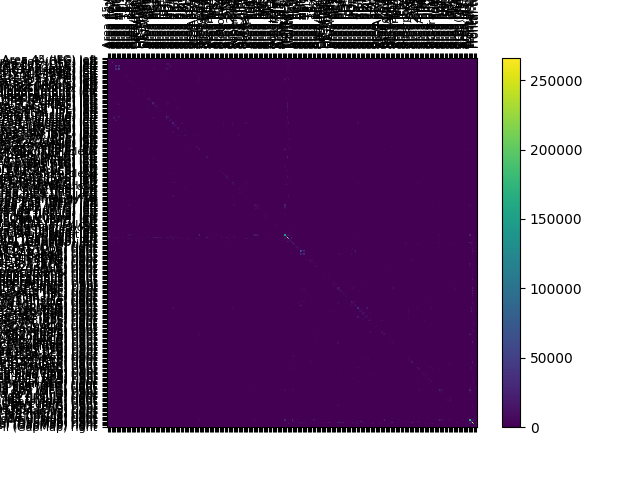

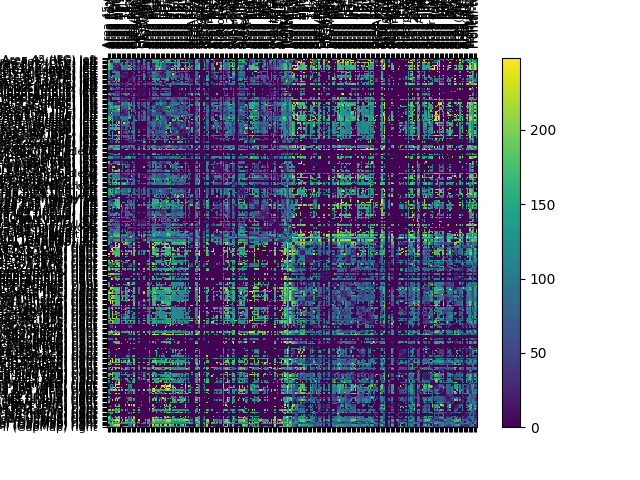

In [23]:
plot_connectivity(connectivity=conn)

In [24]:
# Save connectivity in TVB accepted format
centres_content = np.concatenate((np.array(reg_names)[:, None], positions), axis=1)


root_folder = 'julich_conn'
out_dir = os.path.join(root_folder, subject)
if not os.path.exists(out_dir):
    os.makedirs(out_dir)

np.savetxt(os.path.join(out_dir, "centers.txt"), centres_content, "%s")
np.savetxt(os.path.join(out_dir, "hemispheres.txt"), hemi, "%s")
np.savetxt(os.path.join(out_dir, "weights.txt"), weights_matrix.to_numpy(), "%f")
np.savetxt(os.path.join(out_dir, "tract_lenghts.txt"), tracts_matrix.to_numpy(), "%f")

### Create simulation using the obtained connectivity

In [25]:
sim = simulator.Simulator()
sim.connectivity = conn
sim.simulation_length = 1024
sim.configure()

In [26]:
(time, data),  = sim.run()

WARNING  random_state supplied for non-stochastic integration


In [27]:
time.size

1048

In [28]:
data.shape

(1048, 1, 294, 1)

In [29]:
tsr = time_series.TimeSeriesRegion(
    data=data,
    connectivity=sim.connectivity,
    sample_period=sim.monitors[0].period)
tsr.configure()

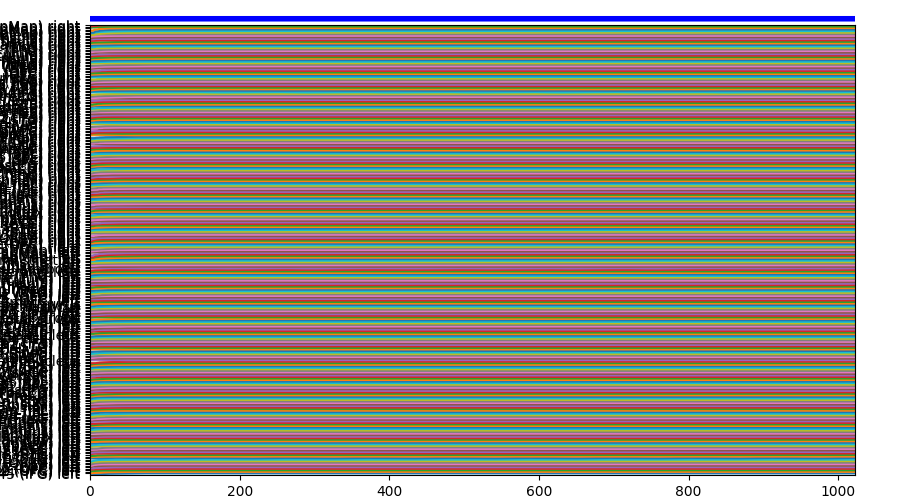

GridBox(children=(Output(layout=Layout(border_bottom='solid 1px black', border_left='solid 1px black', border_…

In [30]:
import tvb.simulator.plot.timeseries_interactive as ts_int
tsi = ts_int.TimeSeriesInteractive(time_series=tsr)
tsi.configure()
tsi.show()